# Description

This notebook contains the interpretation of a cluster (which features/latent variables in the original data are useful to distinguish traits in the cluster).

See section [LV analysis](#lv_analysis) below

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from IPython.display import HTML
from tqdm import tqdm

from clustering.methods import ClusterInterpreter
from data.recount2 import LVAnalysis
from data.cache import read_data
import conf

# Settings

In [3]:
# PARTITION_K = 26
# PARTITION_CLUSTER_ID = 18

# Load MultiPLIER summary

In [4]:
multiplier_model_summary = read_data(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [5]:
multiplier_model_summary.shape

(2157, 5)

In [6]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [7]:
INPUT_SUBSET = "z_score_std"

In [8]:
INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [9]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

In [10]:
data = pd.read_pickle(input_filepath)

In [11]:
data.shape

(3752, 987)

In [12]:
data.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.695006,1.962565,0.057683,0.878731,-0.539977,1.481272,-0.396422,1.090180,0.759223,0.931395,...,1.129784,1.752343,-1.411403,2.823863,0.931116,-1.054519,0.432982,-0.633597,0.554279,-0.642479
100002_raw-Energy,-1.528127,-0.345309,-0.148953,-0.242060,0.373427,0.791092,0.263477,0.987702,0.354391,1.416059,...,0.224604,0.769882,-0.509482,0.091153,2.286789,-1.008256,-0.029764,1.737229,-0.272107,-0.526125
100003_raw-Protein,-0.704572,-1.011299,0.671420,0.143991,0.615212,0.874212,-0.040998,0.915170,0.254369,-0.084237,...,1.003019,1.044314,-2.376108,0.004778,0.053714,-0.892447,-0.183800,1.377991,-0.278794,-0.419733
100004_raw-Fat,-0.989832,-1.875490,0.261555,-1.420719,0.366238,1.167049,0.257387,0.717674,-0.997664,0.969825,...,0.585913,0.638314,0.119139,-0.140204,1.394326,-1.173402,0.555058,1.013982,-0.544506,-0.064061
100005_raw-Carbohydrate,-0.580143,0.243335,0.158966,-0.036558,0.068176,-0.202639,1.101281,0.675227,1.463432,1.010078,...,-0.249108,-0.026814,0.232713,0.323682,1.168642,-0.282935,0.653105,1.909526,0.199997,-1.656894


## Clustering partitions

In [13]:
# CONSENSUS_CLUSTERING_DIR = Path(
#     conf.RESULTS["CLUSTERING_DIR"], "consensus_clustering"
# ).resolve()

# display(CONSENSUS_CLUSTERING_DIR)

In [14]:
# input_file = Path(CONSENSUS_CLUSTERING_DIR, "best_partitions_by_k.pkl").resolve()
# display(input_file)

In [15]:
# best_partitions = pd.read_pickle(input_file)

In [16]:
# best_partitions.shape

In [17]:
# best_partitions.head()

# Functions

In [18]:
# def show_cluster_stats(data, partition, cluster):
#     cluster_traits = data[partition == cluster].index
#     display(f"Cluster '{cluster}' has {len(cluster_traits)} traits")
#     display(cluster_traits)

# LV analysis
<a id="lv_analysis"></a>

## Associated traits

In [19]:
# display(best_partitions.loc[PARTITION_K])
# part = best_partitions.loc[PARTITION_K, "partition"]

In [20]:
# show_cluster_stats(data, part, PARTITION_CLUSTER_ID)

## Associated latent variables

In [21]:
# ci = ClusterInterpreter(
#     threshold=1.0,
#     max_features=20,
#     max_features_to_explore=100,
# )

In [22]:
# ci.fit(data, part, PARTITION_CLUSTER_ID)

In [23]:
# ci.features_

In [24]:
# # save interpreter instance
# output_dir = Path(
#     conf.RESULTS["CLUSTERING_INTERPRETATION"]["BASE_DIR"],
#     "cluster_lvs",
#     f"part{PARTITION_K}",
# )
# output_dir.mkdir(exist_ok=True, parents=True)

In [25]:
# output_file = Path(
#     output_dir, f"cluster_interpreter-part{PARTITION_K}_k{PARTITION_CLUSTER_ID}.pkl"
# )
# display(output_file)

In [26]:
# ci.features_.to_pickle(output_file)

## Top attributes

In [27]:
# lvs_list = "LV116,LV931,LV744,LV697,LV885,LV536,LV550,LV220,LV272,LV739,LV678,LV470,LV66,LV189,LV517,LV840,LV246,LV502,LV525,LV85".split(",")

In [28]:
lvs_list = pd.read_pickle("/tmp/niacin_lv_list.pkl").index.tolist()

In [29]:
len(lvs_list)

987

In [30]:
lvs_list[:10]

['LV881',
 'LV116',
 'LV743',
 'LV38',
 'LV841',
 'LV163',
 'LV161',
 'LV931',
 'LV9',
 'LV536']

In [31]:
def _my_func(x):
    _cols = [c for c in x.index if not c.startswith("LV")]
    _tmp = x[_cols].dropna()
    if _tmp.shape[0] > 0:
        return _tmp.iloc[0]

    return None

In [32]:
cell_type_dfs = []
tissue_dfs = []

pbar = tqdm(lvs_list[:50])
for lv_name in pbar:
    pbar.set_description(lv_name)

    #     lv_name = lv_info["name"]
    lv_obj = LVAnalysis(lv_name, data)

    #     # show lv prior knowledge match (pathways)
    #     lv_pathways = multiplier_model_summary[
    #         multiplier_model_summary["LV index"].isin((lv_name[2:],))
    #         & (
    #             (multiplier_model_summary["FDR"] < 0.05)
    #             | (multiplier_model_summary["AUC"] >= 0.75)
    #         )
    #     ]
    #     display(lv_pathways)

    lv_data = lv_obj.get_experiments_data()

    #     display("")
    #     display(lv_obj.lv_traits.head(20))
    #     display("")
    #     display(lv_obj.lv_genes.head(10))

    # get cell type attributes
    #     lv_attrs = lv_obj.get_attributes_variation_score()
    lv_attrs = pd.Series(lv_data.columns.tolist())
    lv_attrs = lv_attrs[
        lv_attrs.str.match(
            "(?:cell[^\w]*type$)",
            case=False,
            flags=re.IGNORECASE,
        ).values
    ].sort_values(ascending=False)
    display(lv_attrs)

    lv_attrs_data = lv_data[lv_attrs.tolist() + [lv_name]]
    lv_attrs_data = lv_attrs_data.assign(attr=lv_attrs_data.apply(_my_func, axis=1))
    lv_attrs_data = lv_attrs_data.drop(columns=lv_attrs.tolist())
    lv_attrs_data = lv_attrs_data.dropna().sort_values(lv_name, ascending=False)
    lv_attrs_data = lv_attrs_data.rename(columns={lv_name: "lv"})
    cell_type_dfs.append(lv_attrs_data)

    # get tissue attributes
    lv_attrs = pd.Series(lv_data.columns.tolist())
    lv_attrs = lv_attrs[
        lv_attrs.str.match(
            "(?:tissue$)|(?:tissue[^\w]*type$)",
            case=False,
            flags=re.IGNORECASE,
        ).values
    ].sort_values(ascending=False)
    display(lv_attrs)

    lv_attrs_data = lv_data[lv_attrs.tolist() + [lv_name]]
    lv_attrs_data = lv_attrs_data.assign(attr=lv_attrs_data.apply(_my_func, axis=1))
    lv_attrs_data = lv_attrs_data.drop(columns=lv_attrs.tolist())
    lv_attrs_data = lv_attrs_data.dropna().sort_values(lv_name, ascending=False)
    lv_attrs_data = lv_attrs_data.rename(columns={lv_name: "lv"})
    tissue_dfs.append(lv_attrs_data)

LV881:   0%|          | 0/50 [00:00<?, ?it/s]

SRP042161, SRP050499, SRP066834, SRP060416, SRP057196, SRP055569, SRP018525, SRP059035, SRP028301, SRP062773, SRP033135, SRP050440, SRP059379, SRP048603, SRP044917, SRP041102, SRP059775, SRP048604, SRP034711, SRP035312, SRP055101, SRP055153, SRP014428, SRP041255, SRP042286, SRP021509, SRP045570, SRP018838, SRP060370, SRP030617, SRP064457, SRP015138, SRP007461, SRP053186, SRP064259, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (34 != 35)
  warnings.warn(


1    cell type
dtype: object

7    tissue
dtype: object

LV116:   2%|▏         | 1/50 [00:13<11:11, 13.70s/it]

SRP059039, SRP045500, SRP063059, SRP045569, SRP015670, SRP059531, SRP062958, SRP039361, SRP056733, SRP060370, SRP062966, SRP045352, SRP048804, SRP032775, SRP059172, SRP050246, SRP064458, SRP033711, SRP049820, SRP023199, SRP060416, SRP005279, SRP042161, SRP059701, SRP068139, SRP051848, SRP014428, SRP063661, SRP057205, SRP041826, SRP059057, SRP064259, SRP046226, SRP044956, SRP066356, SRP048640, SRP041885, SRP045659, SRP041647, SRP045565, SRP041620, SRP053186, SRP045441, SRP022133, SRP055874, SRP029990, SRP044206, SRP065763, SRP056443, SRP041538, SRP044593, SRP019270, SRP067934, SRP059035, SRP019936, SRP054971, SRP058237, SRP051368, SRP019758, 

8      celltype
21    cell type
dtype: object

79    tissue type
4          tissue
dtype: object

LV743:   4%|▍         | 2/50 [00:27<10:54, 13.63s/it]

SRP059775, SRP028301, SRP018838, SRP011185, SRP030617, SRP050992, SRP014428, SRP055810, SRP062025, SRP042161, SRP059035, SRP058840, SRP066834, 

5    cell type
dtype: object

9    tissue
dtype: object

LV38:   6%|▌         | 3/50 [00:34<09:06, 11.64s/it] 

SRP066834, SRP050499, SRP042161, SRP057196, SRP033135, SRP028301, SRP055153, SRP059775, SRP059035, SRP030617, SRP058773, SRP055569, SRP052294, SRP060598, SRP055810, SRP028570, SRP055101, SRP011546, SRP050992, SRP062177, SRP015138, SRP014428, 

5    cell type
dtype: object

1    tissue
dtype: object

LV841:   8%|▊         | 4/50 [00:45<08:45, 11.43s/it]

SRP057205, SRP051102, SRP007461, SRP034666, SRP014591, SRP015964, SRP057745, SRP042620, SRP017972, SRP021214, SRP018719, SRP049004, SRP055101, SRP038702, SRP010038, SRP008331, SRP017142, SRP039348, SRP061426, SRP059692, SRP009659, SRP006970, SRP014842, SRP001893, SRP045639, SRP052706, SRP026537, SRP048761, SRP013773, SRP056076, SRP006912, SRP012295, SRP067836, SRP052740, SRP009474, SRP038963, SRP022913, SRP050374, SRP043593, SRP055475, SRP044763, SRP004637, SRP011903, SRP002079, SRP012557, SRP043960, SRP007481, SRP037718, SRP018883, SRP016790, SRP043644, SRP018861, SRP049391, SRP059643, SRP033250, SRP029434, SRP061380, SRP020544, SRP045501, SRP031849, SRP017378, SRP040327, SRP051595, SRP060650, SRP040243, SRP021134, SRP033711, SRP043510, SRP007338, SRP050954, SRP045421, SRP058804, SRP042184, SRP051674, SRP007403, SRP052879, SRP017294, SRP051772, SRP044611, SRP018218, SRP041228, SRP028570, SRP010054, SRP046266, SRP006561, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (82 != 85)
  warnings.warn(


6    cell type
dtype: object

16    tissue
dtype: object

LV163:  10%|█         | 5/50 [00:50<07:06,  9.48s/it]

SRP019936, SRP045639, SRP017142, SRP052706, SRP007596, SRP009276, SRP042579, SRP039348, SRP064481, SRP008554, SRP012557, SRP019994, SRP010038, SRP051674, SRP028902, SRP051765, SRP061426, SRP007461, SRP060708, SRP034953, SRP022920, SRP065202, SRP051606, SRP055153, SRP017644, SRP017972, SRP051599, SRP016790, SRP021134, SRP044013, SRP045869, SRP063620, SRP060598, SRP063948, SRP014790, SRP026537, SRP013984, SRP014320, SRP034601, SRP017789, SRP049988, SRP028118, SRP018861, SRP040243, SRP017788, SRP017411, SRP049061, SRP046254, SRP066917, SRP009266, SRP034873, SRP002915, SRP067529, SRP042620, SRP014842, SRP041718, SRP057814, SRP008218, SRP059643, SRP032165, SRP067214, SRP033711, SRP046376, SRP023270, SRP015909, SRP045711, SRP017378, SRP032942, SRP057253, SRP028190, SRP052879, SRP067836, SRP004637, SRP049068, SRP017019, SRP045695, SRP063070, SRP052740, SRP068139, SRP018218, SRP039598, SRP059066, SRP017575, SRP061380, SRP051485, SRP055475, SRP003726, SRP043510, SRP014190, SRP006912, SRP019207,

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (95 != 99)
  warnings.warn(


2    cell type
dtype: object

0     tissue type
12         tissue
dtype: object

LV161:  12%|█▏        | 6/50 [00:56<06:14,  8.52s/it]

SRP061840, SRP004637, SRP058783, SRP012557, SRP019758, SRP042161, SRP018218, SRP049591, SRP014320, SRP064259, SRP032754, SRP042620, SRP026537, SRP058773, SRP024274, SRP035312, SRP034711, SRP003901, SRP066834, SRP018312, SRP037775, SRP062230, SRP043621, SRP063661, SRP059701, SRP057745, SRP014790, SRP021214, SRP048640, SRP042249, SRP020493, SRP041036, SRP022913, SRP016059, SRP051583, SRP041825, SRP061932, SRP055569, SRP012651, SRP060416, SRP051606, SRP010038, SRP050493, SRP028282, SRP044171, SRP018883, SRP014428, SRP048700, SRP008930, SRP057196, SRP015964, SRP033466, SRP041130, SRP021509, SRP033135, SRP030617, SRP059379, SRP009615, SRP045711, SRP028301, SRP007461, SRP043960, SRP002326, SRP031478, SRP041956, SRP056036, SRP009266, SRP057205, SRP055810, SRP049462, SRP029739, SRP007338, SRP027258, SRP005342, SRP044610, SRP011974, SRP012099, SRP049988, SRP062773, SRP016118, SRP056086, SRP022166, SRP028887, SRP055153, SRP042184, SRP049714, SRP063840, SRP061243, SRP017577, SRP057448, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (86 != 90)
  warnings.warn(


16    cell type
dtype: object

12    tissue
dtype: object

LV931:  14%|█▍        | 7/50 [01:10<07:20, 10.25s/it]

SRP056295, SRP017138, SRP043080, SRP048759, SRP021191, SRP028594, SRP056197, SRP050272, SRP059735, SRP028554, SRP061932, SRP033266, SRP005279, SRP055390, SRP050493, SRP046233, SRP035679, SRP043033, SRP041885, SRP027358, SRP045500, SRP045352, SRP015360, SRP053046, 

30     celltype
1     cell type
dtype: object

0    tissue
dtype: object

LV9:  16%|█▌        | 8/50 [01:15<06:07,  8.74s/it]  

SRP017575, SRP019994, SRP036821, SRP006575, SRP023262, SRP033276, SRP034953, SRP036053, SRP022920, SRP009276, SRP007596, SRP044956, SRP045869, 

8    cell type
dtype: object

21    tissue type
0          tissue
dtype: object

LV536:  18%|█▊        | 9/50 [01:17<04:35,  6.73s/it]

SRP007947, SRP003901, SRP055569, SRP037722, SRP008218, SRP066834, SRP015013, SRP060416, SRP019994, SRP057196, SRP042161, SRP058773, SRP012557, SRP050499, SRP055153, SRP059379, SRP030617, SRP005279, SRP051606, SRP003754, SRP058841, SRP009247, SRP050497, SRP018104, SRP007508, SRP008145, SRP041377, SRP002326, SRP035478, SRP033135, SRP017777, SRP055440, SRP057248, SRP000599, SRP013450, SRP014213, SRP055513, SRP042218, SRP034543, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (37 != 39)
  warnings.warn(


0    cell type
dtype: object

3    tissue
dtype: object

LV50:  20%|██        | 10/50 [01:29<05:28,  8.21s/it] 

SRP060416, SRP007461, SRP056295, SRP057196, SRP055390, SRP005279, SRP050499, SRP003726, SRP028594, SRP043434, SRP033266, SRP058237, SRP008218, SRP045500, SRP032789, SRP041538, SRP048759, SRP021891, SRP064458, SRP043080, SRP042161, SRP063834, SRP055440, SRP056197, SRP018359, SRP050272, SRP063363, SRP027364, SRP043339, SRP004847, SRP059695, SRP035679, SRP041885, SRP021193, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (33 != 34)
  warnings.warn(


18     celltype
2     cell type
dtype: object

3    tissue
dtype: object

LV707:  22%|██▏       | 11/50 [01:40<05:53,  9.07s/it]

SRP036821, SRP006575, SRP050499, SRP056049, SRP003227, SRP051102, SRP055569, SRP014428, SRP023262, SRP055675, SRP042161, SRP006475, SRP005279, SRP042616, SRP007359, SRP018525, SRP051765, SRP050215, SRP036053, SRP011546, SRP068523, SRP033369, SRP059057, SRP049063, SRP048971, SRP019994, SRP045898, SRP034543, SRP018838, SRP014867, SRP005177, SRP055390, SRP037735, SRP009067, SRP042218, SRP028594, SRP012461, SRP029452, SRP014146, SRP058977, SRP033135, SRP014739, SRP008976, SRP062025, SRP001563, SRP046233, SRP035599, SRP056295, SRP058840, SRP057250, SRP058120, SRP034712, SRP060715, SRP057745, SRP057244, SRP053046, SRP029739, SRP022920, SRP009266, SRP057852, SRP001540, SRP045869, SRP058046, SRP065988, SRP067214, SRP059775, SRP042043, SRP058841, SRP049648, SRP019222, SRP067661, SRP004847, SRP044206, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (72 != 73)
  warnings.warn(


5    cell type
dtype: object

0    tissue
dtype: object

LV142:  24%|██▍       | 12/50 [01:53<06:29, 10.25s/it]

SRP004847, SRP004965, SRP008218, SRP003726, SRP009266, SRP057196, SRP002915, SRP005279, SRP055569, SRP032789, SRP042161, SRP055513, SRP026042, SRP057244, SRP050954, SRP041538, SRP066834, SRP007461, SRP012461, SRP023262, SRP032833, SRP014790, SRP017575, SRP064464, SRP029262, SRP060416, SRP065202, SRP012099, SRP042218, SRP042620, SRP022920, SRP036821, SRP012656, SRP022591, SRP056733, SRP014670, SRP036053, SRP056098, SRP024268, SRP055390, SRP064458, SRP058722, SRP058773, SRP033135, SRP029592, SRP012557, SRP040998, SRP050499, SRP059379, SRP057205, SRP031776, SRP061426, SRP049097, SRP010678, SRP002628, SRP059057, SRP009251, SRP019994, SRP063838, SRP046376, SRP050892, SRP049409, SRP028118, SRP003611, SRP027383, SRP043080, SRP017142, SRP006575, SRP007338, SRP027364, SRP065219, SRP029207, SRP014624, SRP017972, SRP052879, SRP039397, SRP016140, SRP026537, SRP050003, SRP013984, SRP036848, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (77 != 81)
  warnings.warn(


1    cell type
dtype: object

35    tissue type
0          tissue
dtype: object

LV95:  26%|██▌       | 13/50 [02:16<08:34, 13.90s/it] 

SRP039077, SRP043388, SRP052856, SRP008496, SRP007169, SRP057586, SRP059275, SRP043694, SRP055569, SRP044206, SRP010678, SRP026333, SRP006575, SRP039552, SRP056637, SRP055513, SRP035641, SRP064259, SRP044925, SRP065812, SRP011974, SRP051182, SRP056330, SRP014739, SRP026042, SRP057196, SRP056840, SRP050000, SRP018853, SRP063840, SRP014320, SRP035988, SRP052615, SRP065763, SRP060416, SRP035864, SRP059732, SRP058722, SRP026537, SRP066834, SRP063661, SRP057087, SRP062188, SRP010166, SRP063496, SRP021917, SRP041094, SRP050440, SRP028822, SRP035391, SRP024274, SRP033135, SRP018883, SRP024268, SRP045898, SRP050499, SRP041751, SRP058773, SRP063834, SRP050971, SRP063493, SRP002326, SRP028180, SRP014146, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (63 != 64)
  warnings.warn(


1    cell type
dtype: object

8    tissue type
6         tissue
dtype: object

LV97:  28%|██▊       | 14/50 [02:31<08:35, 14.33s/it]

SRP049988, SRP007461, SRP009862, SRP063658, SRP012557, SRP009790, SRP067836, SRP039397, SRP055860, SRP014920, SRP017019, SRP009266, SRP055153, SRP064464, SRP028902, SRP043960, SRP041228, SRP011578, SRP013935, SRP067934, SRP055863, SRP052950, SRP055569, SRP010907, SRP064259, SRP014027, SRP040998, SRP050087, SRP009123, SRP063834, SRP017411, SRP050003, SRP045048, SRP040692, SRP010166, SRP058626, SRP019240, SRP064321, SRP051544, SRP051606, SRP057248, SRP063620, SRP022876, SRP035387, SRP051485, SRP066956, SRP061701, SRP015845, SRP012461, SRP050551, SRP045659, SRP057196, SRP003901, SRP029262, SRP056696, SRP014190, SRP050497, SRP065491, SRP042620, SRP042184, SRP050440, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (56 != 61)
  warnings.warn(


1    cell type
dtype: object

22    tissue
dtype: object

LV74:  30%|███       | 15/50 [02:38<07:07, 12.21s/it]

SRP010038, SRP043166, SRP042161, SRP006970, SRP066834, SRP064323, SRP042249, SRP055569, SRP041825, SRP057196, SRP049988, SRP024274, SRP059035, SRP014428, SRP063840, SRP016059, SRP007596, SRP047082, SRP050179, SRP029262, SRP033135, SRP060416, SRP060355, SRP026042, SRP048562, SRP064464, SRP056498, SRP019241, SRP013022, SRP009266, SRP064259, SRP041751, SRP056530, SRP050499, SRP067701, SRP017435, SRP041846, SRP004637, SRP061329, SRP061682, SRP042620, SRP020491, SRP059379, SRP020493, SRP035391, SRP033393, SRP025989, SRP050892, SRP032812, SRP007461, SRP045711, SRP042616, SRP018218, SRP057205, SRP049591, SRP033078, SRP058740, SRP022166, SRP055863, SRP011895, SRP045639, SRP021509, SRP045859, SRP056220, SRP041036, SRP027383, SRP051705, SRP058783, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (66 != 68)
  warnings.warn(


0    cell type
dtype: object

4    tissue
dtype: object

LV66:  32%|███▏      | 16/50 [02:57<07:58, 14.07s/it]

SRP048674, SRP029207, SRP021912, SRP051249, SRP040292, SRP055513, SRP055569, SRP057196, SRP050499, SRP017959, SRP029334, SRP045364, SRP043434, SRP049981, SRP042161, SRP008218, SRP020646, SRP011895, SRP012461, SRP021193, SRP012656, SRP026052, SRP050954, SRP037982, SRP049946, SRP027383, SRP022259, SRP049409, SRP056696, SRP018933, SRP002915, SRP033135, SRP009123, SRP058804, SRP043221, SRP066834, SRP050193, SRP048759, SRP047192, SRP050551, SRP008145, SRP060416, SRP044610, SRP050992, SRP004637, SRP044668, SRP057205, SRP058773, SRP042218, SRP016059, SRP058740, SRP040300, SRP020493, SRP039694, SRP040998, SRP058375, SRP056146, SRP010054, SRP039591, SRP019994, SRP014790, SRP014213, SRP007338, SRP029262, SRP014809, SRP018403, SRP041538, SRP063834, SRP034592, SRP018838, SRP007494, SRP050374, SRP002326, SRP007481, SRP030617, SRP026620, SRP052879, SRP015013, SRP033351, SRP058626, SRP061566, SRP039338, SRP017435, SRP044042, SRP015853, SRP007461, SRP007498, SRP003726, SRP066371, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (86 != 89)
  warnings.warn(


1    cell type
dtype: object

38    tissue type
2          tissue
dtype: object

LV974:  34%|███▍      | 17/50 [03:19<09:07, 16.58s/it]

SRP012098, SRP012099, SRP039397, SRP014591, SRP007498, SRP028887, SRP017411, SRP041130, SRP057804, SRP046271, SRP002326, SRP021214, SRP022892, SRP023111, SRP007461, SRP033135, SRP062389, SRP055153, SRP055569, SRP045222, SRP015976, SRP007946, SRP051102, SRP043593, SRP067214, SRP017294, SRP033119, SRP018861, SRP060416, SRP014688, SRP044298, SRP044611, SRP015711, SRP010907, SRP012546, SRP057196, SRP034601, SRP053195, SRP012557, SRP026052, SRP056696, SRP050499, SRP029889, SRP011974, SRP049611, SRP026537, SRP008331, SRP015370, SRP041956, SRP013463, SRP022591, SRP067934, SRP010054, SRP007412, SRP030639, SRP061455, SRP022876, SRP013363, SRP042161, SRP059066, SRP056084, SRP059948, SRP026084, SRP042620, SRP028902, SRP015715, SRP014790, SRP058571, SRP002789, SRP003672, SRP006474, SRP014857, SRP002487, SRP017644, SRP014809, SRP045663, SRP057814, SRP005342, SRP064464, SRP059205, SRP005279, SRP050003, SRP058435, SRP064561, SRP009790, SRP065500, SRP013239, SRP045155, SRP002079, SRP052879, SRP019946,

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (101 != 103)
  warnings.warn(


16    cell type
dtype: object

22    tissue
dtype: object

LV678:  36%|███▌      | 18/50 [03:36<08:52, 16.63s/it]

SRP011924, SRP066729, SRP055569, SRP052978, SRP029889, SRP026315, SRP042161, SRP017933, SRP009266, SRP033135, SRP009862, SRP014428, SRP006475, SRP055810, SRP062177, SRP034712, SRP028301, SRP044206, SRP012056, SRP057196, SRP057118, SRP045573, SRP024268, SRP018838, SRP060416, SRP018719, SRP061888, SRP058840, SRP002915, SRP059775, SRP014867, SRP033276, SRP029899, SRP021478, SRP049500, SRP036821, SRP055513, SRP058773, SRP045666, SRP041706, SRP011185, SRP006575, SRP028336, SRP043368, SRP012461, SRP058740, SRP007947, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (45 != 47)
  warnings.warn(


2    cell type
dtype: object

0    tissue
dtype: object

LV879:  38%|███▊      | 19/50 [03:51<08:21, 16.19s/it]

SRP041179, SRP048761, SRP002079, SRP039397, SRP047194, SRP047233, SRP049553, SRP017684, SRP045876, SRP022028, SRP061416, SRP045308, SRP006561, SRP041738, SRP047516, SRP060650, SRP063669, SRP018848, SRP035482, SRP035417, SRP013999, SRP033432, SRP058804, SRP041159, SRP049340, SRP028804, SRP039346, SRP064624, SRP046749, SRP032928, SRP049203, SRP013825, SRP033267, SRP049475, SRP047339, SRP041377, SRP037579, SRP061682, SRP055569, SRP028118, SRP050499, SRP032798, SRP056957, SRP059205, SRP041751, SRP008225, SRP014671, SRP048825, SRP036821, SRP040525, SRP056076, SRP021134, SRP055440, SRP003021, SRP016140, 

1    cell type
dtype: object

22    tissue
dtype: object

LV969:  40%|████      | 20/50 [03:56<06:29, 13.00s/it]

SRP055569, SRP042161, SRP057196, SRP033135, SRP049238, SRP042184, SRP014671, SRP028180, SRP017019, SRP026052, SRP065500, SRP044042, SRP060416, SRP057205, SRP066834, SRP019758, SRP029334, SRP012461, SRP044241, SRP058773, SRP059431, SRP043578, SRP062188, SRP007359, SRP017411, SRP026537, SRP031478, SRP009247, SRP019994, SRP009374, SRP064259, SRP015013, SRP065202, SRP022892, SRP055153, SRP049465, SRP015439, SRP011185, SRP042620, SRP009862, SRP012557, SRP013402, SRP065153, SRP034528, SRP050193, SRP009266, SRP065763, SRP042218, SRP006575, SRP033276, SRP011974, SRP066956, SRP063661, SRP017972, SRP057500, SRP009276, SRP038963, SRP002184, SRP026620, SRP013363, SRP017644, SRP011422, SRP049500, SRP051595, SRP010678, SRP059035, SRP049756, SRP007338, SRP021912, SRP018838, SRP012651, SRP032165, SRP011546, SRP061455, SRP045869, SRP014027, SRP007596, SRP010038, SRP044854, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (75 != 79)
  warnings.warn(


0    cell type
dtype: object

4    tissue
dtype: object

LV27:  42%|████▏     | 21/50 [04:17<07:24, 15.31s/it] 

SRP007461, SRP049377, SRP010678, SRP011974, SRP026013, SRP019936, SRP042620, SRP014320, SRP004637, SRP018883, SRP024274, SRP055475, SRP009266, SRP026537, SRP027258, SRP006731, SRP031478, SRP059431, SRP012651, SRP009862, SRP065500, SRP046376, SRP052856, SRP007403, SRP044925, SRP065763, SRP006575, SRP010644, SRP044854, SRP065202, SRP049465, SRP034528, SRP063661, SRP050036, SRP049756, SRP056637, SRP057448, SRP042218, SRP006726, SRP051606, SRP026042, SRP019758, SRP055569, SRP015361, SRP021891, SRP064259, SRP044241, SRP041956, SRP035641, SRP063493, SRP009251, SRP022876, SRP065153, SRP039077, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (50 != 54)
  warnings.warn(


0    cell type
dtype: object

8    tissue type
9         tissue
dtype: object

LV509:  44%|████▍     | 22/50 [04:24<05:54, 12.68s/it]

SRP009266, SRP013725, SRP006575, SRP023262, SRP009862, SRP065202, SRP055569, SRP035391, SRP043962, SRP061241, SRP002487, SRP007596, SRP042579, SRP050365, SRP045869, SRP033119, SRP002915, SRP028815, SRP026315, SRP005177, SRP012056, SRP044611, SRP067214, SRP026537, SRP033369, SRP012461, SRP019936, SRP019994, SRP046749, SRP033135, SRP014739, SRP049500, SRP007461, SRP057196, SRP010350, SRP007359, SRP039348, SRP017644, SRP024268, SRP052950, SRP005279, SRP051102, SRP065559, SRP004637, SRP040136, SRP048536, SRP006475, SRP009276, SRP058120, SRP004847, SRP033276, SRP060416, SRP042161, SRP014320, SRP041210, SRP020493, SRP051599, SRP045905, SRP055153, SRP049988, SRP003611, SRP036821, SRP042616, SRP043378, SRP051765, SRP014790, SRP017789, SRP032510, SRP050036, SRP017411, SRP064464, SRP056696, SRP060661, SRP003726, SRP022920, SRP013984, SRP055810, SRP063620, SRP045898, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (75 != 79)
  warnings.warn(


1    cell type
dtype: object

38    tissue type
4          tissue
dtype: object

LV272:  46%|████▌     | 23/50 [04:41<06:19, 14.05s/it]

SRP055569, SRP042161, SRP006474, SRP033135, SRP017575, SRP036821, SRP006575, SRP057196, SRP009266, SRP050499, SRP066834, SRP065202, SRP019994, SRP060416, SRP047192, SRP005279, SRP059775, SRP049097, SRP059379, SRP058773, SRP007359, SRP061241, SRP012461, SRP009862, SRP042620, SRP049713, SRP014620, SRP057745, SRP003754, SRP033369, SRP033276, SRP014428, SRP027383, SRP049238, SRP045322, SRP062230, SRP024268, SRP058841, SRP018838, SRP002915, SRP055810, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (38 != 41)
  warnings.warn(


0    cell type
dtype: object

33    tissue type
12         tissue
dtype: object

LV905:  48%|████▊     | 24/50 [04:58<06:32, 15.08s/it]

SRP027358, SRP055569, SRP067661, SRP041885, SRP062025, SRP033135, SRP042616, SRP050499, SRP051102, SRP015138, SRP056295, SRP050146, SRP051765, SRP046233, SRP028594, SRP055390, SRP055103, SRP048759, SRP056074, SRP033266, SRP058719, SRP042161, SRP049063, SRP056197, SRP042043, SRP047323, 

3    cell type
dtype: object

1    tissue
dtype: object

LV254:  50%|█████     | 25/50 [05:09<05:46, 13.87s/it]

SRP055569, SRP033135, SRP060416, SRP042161, SRP012461, SRP057196, SRP058722, SRP026315, SRP066834, SRP058773, SRP018853, SRP003754, SRP050499, SRP010350, SRP057248, SRP049238, SRP013402, SRP023111, SRP018525, SRP033116, SRP007508, SRP050223, SRP018838, SRP033119, SRP013450, SRP002184, SRP058120, SRP042218, SRP014213, SRP015013, SRP042620, SRP050246, SRP045611, SRP057205, SRP059775, SRP063070, SRP050992, SRP009266, SRP059950, SRP041036, SRP063840, SRP009862, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (39 != 42)
  warnings.warn(


0    cell type
dtype: object

15    tissue
dtype: object

LV720:  52%|█████▏    | 26/50 [05:26<05:53, 14.74s/it]

SRP067214, SRP028570, SRP061639, SRP050246, SRP057629, SRP007498, SRP017577, SRP064323, SRP051472, SRP026052, SRP051644, SRP015419, SRP050138, SRP007461, SRP033117, SRP048669, SRP064143, SRP045421, SRP056084, SRP035419, SRP026620, SRP043960, SRP064735, SRP061881, SRP028155, SRP050193, SRP033569, SRP046266, SRP013363, SRP002605, SRP045441, SRP055411, SRP062389, SRP058479, SRP033466, SRP056036, SRP050333, SRP041036, SRP019275, SRP013724, SRP019810, SRP062230, SRP058098, SRP026126, SRP049238, SRP047097, SRP057205, SRP047082, SRP002487, SRP015640, SRP064562, SRP021918, SRP061840, SRP031858, SRP057512, SRP056369, SRP061425, SRP057613, SRP005174, SRP063980, SRP058244, SRP044673, SRP011378, SRP056074, SRP048660, SRP051170, SRP045322, SRP051320, SRP041162, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (68 != 69)
  warnings.warn(


9    cell type
dtype: object

18    tissue
dtype: object

LV587:  54%|█████▍    | 27/50 [05:32<04:38, 12.13s/it]

SRP055569, SRP046254, SRP051599, SRP050179, SRP040243, SRP049061, SRP012607, SRP044763, SRP067529, SRP049507, SRP017142, SRP045867, SRP056989, SRP017631, SRP034541, SRP033401, SRP007461, SRP060598, SRP015976, SRP043510, SRP017972, SRP007494, SRP041508, SRP009862, SRP064820, SRP066917, SRP034163, SRP016790, SRP033131, SRP014320, SRP023270, SRP017378, SRP033502, SRP057205, SRP058387, SRP008554, SRP050499, SRP041387, SRP033351, SRP004637, SRP050374, SRP007481, SRP018218, SRP043162, SRP051606, SRP016059, SRP039397, SRP009266, SRP064464, SRP037550, SRP041036, SRP066834, SRP041063, SRP041573, SRP055153, SRP057196, SRP057251, SRP056146, SRP042161, SRP049340, SRP004042, SRP033135, SRP012167, SRP068942, SRP047299, SRP060416, SRP056330, SRP050534, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (64 != 68)
  warnings.warn(


0    cell type
dtype: object

7    tissue
dtype: object

LV608:  56%|█████▌    | 28/50 [05:48<04:48, 13.12s/it]

SRP055569, SRP033135, SRP066834, SRP042161, SRP012461, SRP057196, SRP060416, SRP018838, SRP058773, SRP011578, SRP045659, SRP050499, SRP059170, SRP034953, SRP056733, SRP030617, SRP005279, SRP064464, SRP063840, SRP009251, SRP059775, SRP011054, SRP029656, SRP007338, SRP059379, SRP009266, SRP048801, SRP057205, SRP006575, SRP059039, SRP055153, SRP045869, SRP017575, SRP002487, SRP015013, SRP016003, SRP025982, SRP017777, SRP056840, SRP050000, SRP033248, SRP019994, SRP024268, SRP007947, SRP028336, SRP042228, SRP049068, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (46 != 47)
  warnings.warn(


0    cell type
dtype: object

7    tissue
dtype: object

LV246:  58%|█████▊    | 29/50 [06:16<06:08, 17.57s/it]

SRP042186, SRP045545, SRP044756, SRP051211, SRP042620, SRP055749, SRP029899, SRP021478, SRP042086, SRP065812, SRP007412, SRP020470, SRP037778, SRP042161, SRP029889, SRP057196, SRP053101, SRP050499, SRP035988, SRP033135, SRP034712, SRP012461, SRP056041, SRP048674, SRP059643, SRP045364, SRP026042, SRP050971, SRP051705, SRP035387, SRP055512, SRP007461, SRP065451, SRP007338, SRP019936, SRP055569, SRP060355, SRP058571, SRP041377, SRP040998, SRP059379, SRP036133, SRP066834, SRP051772, SRP044056, SRP048669, SRP059066, SRP068078, SRP060359, SRP055475, SRP058771, SRP045639, SRP043085, SRP062177, SRP064464, SRP041597, SRP056696, SRP059035, SRP010678, SRP049593, SRP048536, SRP061566, SRP030617, SRP057804, SRP045156, SRP044171, SRP010644, SRP057448, SRP041751, SRP061701, SRP033131, SRP041387, SRP063834, SRP020493, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (72 != 74)
  warnings.warn(


0    cell type
dtype: object

17    tissue type
10         tissue
dtype: object

LV20:  60%|██████    | 30/50 [06:30<05:33, 16.68s/it] 

SRP014213, SRP042161, SRP007596, SRP009247, SRP057196, SRP011422, SRP029452, SRP055569, SRP045569, SRP026537, SRP033464, SRP003901, SRP066834, SRP059692, SRP007338, SRP035387, SRP025989, SRP036821, SRP060416, SRP057745, SRP058773, SRP019994, SRP024268, SRP060355, SRP056957, SRP032775, SRP049820, SRP029889, SRP055153, SRP041833, SRP017575, SRP022892, SRP050499, SRP056295, SRP012098, SRP012099, SRP033248, SRP014320, SRP011578, SRP036848, SRP034528, SRP058740, SRP002326, SRP055513, SRP064464, SRP034712, SRP033135, SRP059732, SRP041751, SRP049097, SRP029334, SRP065202, SRP006575, SRP014620, SRP057500, SRP063661, SRP036053, SRP043694, SRP008775, SRP039361, SRP049981, SRP015670, SRP011185, SRP018020, SRP064259, SRP010279, SRP018838, SRP010166, SRP043033, SRP053004, SRP018837, SRP004837, SRP041988, SRP008145, SRP063840, SRP018242, SRP058667, SRP005279, SRP018403, SRP019248, SRP041538, SRP031507, SRP063834, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (81 != 83)
  warnings.warn(


1    cell type
dtype: object

101    tissue type
8           tissue
dtype: object

LV854:  62%|██████▏   | 31/50 [06:48<05:21, 16.92s/it]

SRP045352, SRP059695, SRP058237, SRP015360, SRP043033, SRP041826, SRP060416, SRP057852, SRP056295, SRP017138, SRP010644, SRP048801, SRP042228, SRP056733, SRP050272, SRP045500, SRP056197, SRP056098, SRP035679, SRP044303, SRP057196, SRP044286, SRP063363, SRP063493, SRP063500, SRP043080, SRP014856, SRP007461, SRP048759, SRP003726, SRP059205, SRP042031, SRP028594, SRP063496, SRP049097, SRP039361, SRP050000, SRP056840, SRP059735, SRP064454, SRP033266, SRP050493, SRP046233, SRP062958, SRP052491, SRP044271, SRP032789, SRP021191, SRP033466, SRP041538, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (49 != 50)
  warnings.warn(


30     celltype
0     cell type
dtype: object

64    tissue type
4          tissue
dtype: object

LV840:  64%|██████▍   | 32/50 [07:00<04:39, 15.55s/it]

SRP043417, SRP028301, SRP059775, SRP062177, SRP012056, SRP033119, SRP040278, SRP058300, SRP034543, SRP056084, SRP038695, SRP058841, SRP059948, SRP042161, SRP009266, SRP006475, SRP045501, SRP033369, SRP058773, SRP018861, SRP041036, SRP055810, SRP055569, SRP029245, SRP018719, SRP015964, SRP014867, SRP010280, SRP048536, SRP002605, SRP053402, SRP063339, SRP019250, SRP007461, SRP044653, SRP046749, SRP039397, SRP052950, SRP056036, SRP043962, SRP061539, SRP019989, SRP064481, SRP045481, SRP028887, SRP013725, SRP009861, SRP041263, SRP058087, SRP019241, SRP050055, SRP011546, SRP039348, SRP010430, SRP058191, SRP049510, SRP056200, SRP060637, SRP021214, SRP060416, SRP041656, SRP064464, SRP041396, SRP053052, SRP029515, SRP064317, SRP001349, SRP041130, SRP017644, SRP059266, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (68 != 70)
  warnings.warn(


2    cell type
dtype: object

52    tissue
dtype: object

LV903:  66%|██████▌   | 33/50 [07:08<03:43, 13.17s/it]

SRP064464, SRP039552, SRP004847, SRP039077, SRP066956, SRP050440, SRP056330, SRP028336, SRP006676, SRP051182, SRP010483, SRP063661, SRP064321, SRP046226, SRP051606, SRP058722, SRP047383, SRP035268, SRP059732, SRP043434, SRP063493, SRP059509, SRP063834, SRP026537, SRP004837, SRP064259, SRP062287, SRP028180, SRP052057, SRP044917, SRP018883, SRP004965, SRP011974, SRP012656, SRP059275, SRP019936, SRP041538, SRP040442, SRP051544, SRP043388, SRP058237, SRP033250, SRP031478, SRP029262, SRP037775, SRP003726, SRP019207, SRP016059, SRP059035, SRP049988, SRP063840, SRP042620, SRP065763, SRP017411, SRP008218, SRP065491, SRP009266, SRP032789, SRP006900, SRP002628, SRP048700, SRP051595, SRP059733, SRP035387, SRP050003, SRP010678, SRP019241, SRP002326, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (67 != 68)
  warnings.warn(


5    cell type
dtype: object

60    tissue type
9          tissue
dtype: object

LV310:  68%|██████▊   | 34/50 [07:14<02:55, 10.96s/it]

SRP012461, SRP034712, SRP008218, SRP045364, SRP057196, SRP060416, SRP055569, SRP049946, SRP064464, SRP040998, SRP004965, SRP056696, SRP045500, SRP045352, SRP050954, SRP029889, SRP021478, SRP029899, SRP012557, SRP050499, SRP050551, SRP037982, SRP063889, SRP009123, SRP015439, SRP042161, SRP058626, SRP049714, SRP049409, SRP060355, SRP066834, SRP029207, SRP007481, SRP021912, SRP050374, SRP033351, SRP041538, SRP007947, SRP033135, SRP063834, SRP007338, SRP055810, SRP032833, SRP063059, SRP004847, SRP043162, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (44 != 46)
  warnings.warn(


34     celltype
0     cell type
dtype: object

77    tissue type
11         tissue
dtype: object

LV824:  70%|███████   | 35/50 [07:27<02:56, 11.75s/it]

SRP057205, SRP055569, SRP060416, SRP042161, SRP057196, SRP066834, SRP007498, SRP050499, SRP007947, SRP033135, SRP024268, SRP031507, SRP059379, SRP064464, SRP058773, SRP030617, SRP009862, SRP049340, SRP058351, SRP018719, SRP008218, SRP042119, SRP059279, SRP040145, SRP003726, SRP030475, SRP050992, SRP049391, SRP050147, SRP045294, SRP005129, SRP056076, SRP064259, SRP004847, SRP026537, SRP019241, SRP051472, SRP041263, SRP063867, SRP044611, SRP031858, SRP041008, SRP032928, SRP026033, SRP011378, SRP003021, SRP014320, SRP049475, SRP061840, SRP050365, SRP011546, SRP014626, SRP056084, SRP049593, SRP018861, SRP026084, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (54 != 56)
  warnings.warn(


5    cell type
dtype: object

10    tissue
dtype: object

LV507:  72%|███████▏  | 36/50 [07:41<02:54, 12.45s/it]

SRP059170, SRP055569, SRP057196, SRP018838, SRP045565, SRP029513, SRP033135, SRP006474, SRP042161, SRP003227, SRP057244, SRP066834, SRP060416, SRP064464, SRP062025, SRP057248, SRP056049, SRP014320, SRP055810, SRP063840, SRP050992, SRP014428, SRP045052, SRP037735, SRP059035, SRP014620, SRP067661, SRP038963, SRP043033, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (28 != 29)
  warnings.warn(


4    cell type
dtype: object

3    tissue
dtype: object

LV19:  74%|███████▍  | 37/50 [07:52<02:36, 12.06s/it] 

SRP015789, SRP017123, SRP055513, SRP055918, SRP041751, SRP007494, SRP017959, SRP047192, SRP055569, SRP036821, SRP042161, SRP017575, SRP056220, SRP023262, SRP006575, SRP014790, SRP024268, SRP019994, SRP009247, SRP042620, SRP060416, SRP051249, SRP048761, SRP015909, SRP050892, SRP063493, SRP026537, SRP020493, SRP064464, SRP062873, SRP006900, SRP009266, SRP018853, SRP004637, SRP061426, SRP018359, SRP030475, SRP038963, SRP016118, SRP039077, SRP028554, SRP007461, SRP044611, SRP025982, SRP019936, SRP042579, SRP050003, SRP029262, SRP041573, SRP021214, SRP061380, SRP008218, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (50 != 52)
  warnings.warn(


6    cell type
dtype: object

45    tissue type
0          tissue
dtype: object

LV517:  76%|███████▌  | 38/50 [08:08<02:38, 13.18s/it]

SRP055569, SRP057196, SRP015449, SRP002326, SRP042161, SRP060416, SRP033206, SRP030401, SRP025989, SRP050892, SRP040421, SRP012461, SRP064259, SRP050499, SRP009266, SRP018104, SRP005279, SRP066834, SRP006970, SRP057205, SRP029889, SRP019994, SRP018020, SRP043960, SRP009862, SRP017199, SRP058773, SRP014624, SRP018838, SRP015976, SRP060359, SRP014867, SRP033119, SRP059775, SRP014320, SRP063840, SRP041788, SRP056696, SRP017575, SRP018719, SRP027345, SRP017933, SRP046266, SRP030617, SRP015670, SRP015013, SRP044206, SRP017190, SRP055863, SRP011422, SRP007338, SRP015678, SRP045639, SRP006575, SRP028325, SRP033135, SRP059039, SRP004837, SRP059732, SRP062389, SRP059379, SRP014428, SRP002605, SRP023262, SRP027258, SRP036821, SRP010038, SRP038964, SRP041162, SRP014027, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (67 != 70)
  warnings.warn(


0    cell type
dtype: object

1    tissue
dtype: object

LV513:  78%|███████▊  | 39/50 [08:24<02:32, 13.89s/it]

SRP055569, SRP060416, SRP042161, SRP012461, SRP031507, SRP007498, SRP057205, SRP050499, SRP042218, SRP018242, SRP057196, SRP003754, SRP066834, SRP063840, SRP018838, SRP059379, SRP034007, SRP055153, SRP042620, SRP057244, SRP000599, SRP007596, SRP050365, SRP007461, SRP033135, SRP009266, SRP006474, SRP006575, SRP023262, SRP029334, SRP026537, SRP026315, SRP064464, SRP009276, SRP045659, SRP050374, SRP025982, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (33 != 37)
  warnings.warn(


0    cell type
dtype: object

28    tissue
dtype: object

LV864:  80%|████████  | 40/50 [08:42<02:33, 15.35s/it]

SRP056498, SRP017788, SRP028155, SRP062544, SRP034873, SRP019275, SRP013022, SRP040300, SRP059692, SRP019936, SRP043090, SRP041962, SRP033250, SRP028570, SRP032456, SRP044265, SRP056041, SRP042620, SRP051606, SRP064625, SRP020493, SRP015764, SRP064259, SRP047065, SRP042303, SRP066356, SRP017789, SRP026537, SRP058571, SRP048669, SRP057512, SRP047299, SRP049340, SRP060598, SRP057196, SRP055569, SRP046266, SRP045639, SRP066424, SRP026620, SRP026256, SRP033135, SRP061425, SRP055153, SRP045695, SRP014842, SRP066917, SRP045421, SRP054971, SRP004637, SRP060416, SRP062617, SRP051000, SRP051595, SRP059035, SRP027514, SRP018778, SRP058260, SRP058773, SRP066834, SRP017019, SRP044013, SRP063070, SRP017378, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (63 != 64)
  warnings.warn(


0    cell type
dtype: object

16    tissue type
9          tissue
dtype: object

LV674:  82%|████████▏ | 41/50 [08:52<02:02, 13.66s/it]

SRP063840, SRP056530, SRP024268, SRP007947, SRP019240, SRP057196, SRP051485, SRP052612, SRP029889, SRP059035, SRP063661, SRP066834, SRP039552, SRP055569, SRP042161, SRP064464, SRP058667, SRP056153, SRP060370, SRP014428, SRP060355, SRP059379, SRP059732, SRP013935, SRP044206, SRP052057, SRP060416, SRP060708, SRP030617, SRP055153, SRP050272, SRP051401, SRP033135, SRP014739, SRP035387, SRP006474, SRP059275, SRP026052, SRP028336, SRP057074, SRP045565, SRP050003, SRP059170, SRP032363, SRP018779, SRP050499, SRP050954, SRP018838, SRP007412, SRP044042, 

0    cell type
dtype: object

33    tissue type
4          tissue
dtype: object

LV670:  84%|████████▍ | 42/50 [09:05<01:46, 13.36s/it]

SRP012167, SRP055569, SRP060416, SRP003901, SRP028336, SRP064464, SRP024268, SRP010483, SRP057196, SRP058773, SRP066834, SRP057248, SRP042161, SRP035268, SRP060355, SRP059732, SRP052056, SRP039552, SRP055810, SRP027530, SRP029262, SRP041751, SRP027364, SRP059509, SRP018853, SRP056330, SRP064735, SRP058722, SRP042620, SRP058667, SRP032812, SRP006575, SRP041094, SRP041826, SRP055512, SRP035387, SRP032789, SRP002487, SRP009862, SRP045276, SRP019936, SRP058237, SRP042184, SRP066356, SRP033135, SRP055153, SRP004837, SRP002326, SRP048222, SRP043434, SRP002628, SRP007412, SRP009266, SRP035477, SRP033401, SRP045352, SRP067701, SRP055513, SRP057244, SRP050499, SRP040243, SRP063834, SRP004847, SRP050534, SRP059950, SRP014856, SRP026042, SRP050087, SRP049713, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (67 != 69)
  warnings.warn(


4    cell type
dtype: object

55    tissue type
1          tissue
dtype: object

LV684:  86%|████████▌ | 43/50 [09:18<01:34, 13.45s/it]

SRP053004, SRP018525, SRP011546, SRP008775, SRP042161, SRP057196, SRP066834, SRP007596, SRP055569, SRP050499, SRP017777, SRP058773, SRP060416, SRP033135, SRP018838, SRP014213, SRP063840, SRP055153, SRP003901, SRP059775, SRP064464, SRP055810, SRP058722, SRP042620, SRP015668, SRP018853, SRP010279, SRP030617, SRP028301, SRP059035, SRP058571, SRP009266, SRP050992, SRP029334, SRP033248, SRP013363, SRP064259, SRP061639, SRP011054, SRP009247, SRP011185, SRP062025, SRP007947, SRP018837, SRP014591, SRP022913, SRP002487, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (45 != 47)
  warnings.warn(


3    cell type
dtype: object

0    tissue type
6         tissue
dtype: object

LV189:  88%|████████▊ | 44/50 [09:32<01:21, 13.60s/it]

SRP037775, SRP064259, SRP033250, SRP026537, SRP045322, SRP042620, SRP042161, SRP055569, SRP049500, SRP006575, SRP030475, SRP011974, SRP049507, SRP030401, SRP043470, SRP057205, SRP061241, SRP055512, SRP059379, SRP058722, SRP063620, SRP049988, SRP019498, SRP060416, SRP057196, SRP065202, SRP033135, SRP018853, SRP011054, SRP019936, SRP013389, SRP063840, SRP066834, SRP032789, SRP048664, SRP040966, SRP047192, SRP061243, SRP004637, SRP012557, SRP040418, SRP023262, SRP044610, SRP058571, SRP055153, SRP051102, SRP031503, SRP058773, SRP012167, SRP043320, SRP035988, SRP067214, SRP049713, SRP040505, SRP050971, SRP057758, SRP013239, SRP029334, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (56 != 58)
  warnings.warn(


2    cell type
dtype: object

51    tissue type
8          tissue
dtype: object

LV530:  90%|█████████ | 45/50 [09:45<01:07, 13.40s/it]

SRP042161, SRP055569, SRP013450, SRP057196, SRP051472, SRP066834, SRP060416, SRP005279, SRP050374, SRP058773, SRP049714, SRP033135, SRP030617, SRP041008, SRP019994, SRP050179, SRP007461, SRP004637, SRP051599, SRP006474, SRP002245, SRP038767, SRP017631, SRP033569, SRP042597, SRP050499, SRP033351, SRP057205, SRP056989, SRP008331, SRP033119, SRP018719, SRP013389, SRP055153, SRP029656, SRP049449, SRP043339, SRP041751, SRP034666, SRP035617, SRP059379, SRP050468, SRP066371, SRP015964, SRP053366, SRP034007, SRP051249, SRP047082, SRP014213, SRP039348, SRP049340, SRP013999, SRP044084, SRP007338, SRP051772, SRP050246, SRP019374, SRP032775, SRP012557, SRP040525, SRP041885, SRP063840, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (60 != 62)
  warnings.warn(


1    cell type
dtype: object

8    tissue
dtype: object

LV55:  92%|█████████▏| 46/50 [09:59<00:53, 13.34s/it] 

SRP055513, SRP005279, SRP003227, SRP003726, SRP032279, SRP002915, SRP015449, SRP030617, SRP004847, SRP009266, SRP029889, SRP050499, SRP055153, SRP037719, SRP019994, SRP011578, SRP014620, SRP008218, SRP007947, SRP066834, SRP055569, SRP027383, SRP036821, SRP060416, SRP009862, SRP064259, SRP042161, SRP007569, SRP033135, SRP006575, SRP016140, SRP012461, SRP050260, SRP041751, SRP024268, SRP024244, SRP057196, SRP014867, SRP004965, SRP017575, SRP068523, SRP042218, SRP028804, SRP048556, SRP036053, SRP026315, SRP053052, SRP014428, SRP049449, SRP015853, SRP007412, SRP057156, SRP037735, SRP004042, SRP047194, SRP029334, SRP056296, SRP048761, SRP039591, SRP038767, SRP064624, SRP041179, SRP028902, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (60 != 63)
  warnings.warn(


6    cell type
dtype: object

0    tissue
dtype: object

LV739:  94%|█████████▍| 47/50 [10:13<00:40, 13.59s/it]

SRP042161, SRP066834, SRP059379, SRP009862, SRP057196, SRP062025, SRP063840, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (6 != 7)
  warnings.warn(


1    cell type
dtype: object

5    tissue
dtype: object

LV667:  96%|█████████▌| 48/50 [10:18<00:22, 11.12s/it]

SRP055569, SRP024268, SRP042161, SRP066834, SRP057196, SRP002326, SRP060416, SRP019994, SRP063840, SRP014428, SRP058773, SRP030617, SRP045869, SRP050499, SRP049479, SRP003726, SRP007461, SRP064464, SRP033135, SRP055153, SRP044042, SRP012461, SRP059035, SRP011422, SRP061380, SRP051320, SRP052740, SRP064458, SRP009266, SRP018838, SRP027383, SRP029656, SRP045711, SRP006575, SRP048577, SRP015670, SRP055513, SRP008145, SRP028336, SRP003611, SRP057852, SRP058667, SRP041094, SRP063500, SRP044668, SRP057205, SRP004847, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (45 != 47)
  warnings.warn(


0    cell type
dtype: object

61    tissue type
1          tissue
dtype: object

LV893:  98%|█████████▊| 49/50 [10:32<00:12, 12.09s/it]

SRP007461, SRP017411, SRP009266, SRP046271, SRP009862, SRP067214, SRP002789, SRP003672, SRP043593, SRP015711, SRP043962, SRP057065, SRP015955, SRP012096, SRP061455, SRP017294, SRP045222, SRP044298, SRP013773, SRP062389, SRP045663, SRP044679, SRP053195, SRP017305, SRP066424, SRP019270, SRP049611, SRP019946, SRP014844, SRP021214, SRP007498, SRP055048, SRP026315, SRP028815, SRP005342, SRP019989, SRP058479, SRP057196, SRP026084, SRP001758, SRP050943, SRP030639, SRP023199, SRP014925, SRP002605, SRP026052, SRP014857, SRP012098, SRP051170, SRP014190, SRP057804, SRP012099, SRP033131, SRP017577, SRP051644, SRP014320, SRP064143, SRP028325, SRP026044, SRP021918, SRP047097, SRP034158, SRP050138, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (59 != 63)
  warnings.warn(


0    cell type
dtype: object

41    tissue
dtype: object

LV893: 100%|██████████| 50/50 [10:36<00:00, 12.73s/it]


# LVs selection

In [33]:
N_TOP_LVS = 20

# Cell types

In [34]:
def _get_lv_rank(data):
    data = data.copy()
    data["lv"] = data["lv"].rank()
    return data

In [35]:
df = pd.concat(cell_type_dfs[:N_TOP_LVS], ignore_index=True)
# df = pd.concat([_get_lv_rank(x) for x in cell_type_dfs[:N_TOP_LVS]], ignore_index=True)

In [36]:
df = df[~df["attr"].str.lower().str.contains("cancer")]

In [37]:
df.groupby("attr").median().squeeze().sort_values(ascending=False).head(25)

attr
ovarian granulosa cells                                                                       2.529479
mural granulosa cells                                                                         1.869020
cumulus granulosa cells                                                                       1.846062
CD14 cells                                                                                    0.893452
M1-polarized HMDM                                                                             0.881763
Differentiated fused HEF19 and FL24 cells                                                     0.789934
MCF10A breast epithelial cells                                                                0.758430
PBMCs                                                                                         0.735288
Primary Monocytes(BC8)                                                                        0.690342
BJ fibroblast cells                                                 

In [38]:
df = df.replace(
    {
        "attr": {
            "mural granulosa cells": "Granulosa cells",
            "cumulus granulosa cells": "Granulosa cells",
            "WAT": "White adipose tissue",
            "BAT": "Brown adipose tissue",
            "human adipose-derived stem cells": "Adipose-derived stem cells",
            "Primary Monocytes(BC8)": "Primary monocytes",
            "Primary Monocytes(BC9)": "Primary monocytes",
            "Primary Monocytes(BC12)": "Primary monocytes",
            "Primary Monocytes(BC11)": "Primary monocytes",
        }
    }
)

In [39]:
cat_order = df.groupby("attr").median().squeeze()
cat_order = cat_order.sort_values(ascending=False)
cat_order = cat_order.head(20)
cat_order = cat_order.index

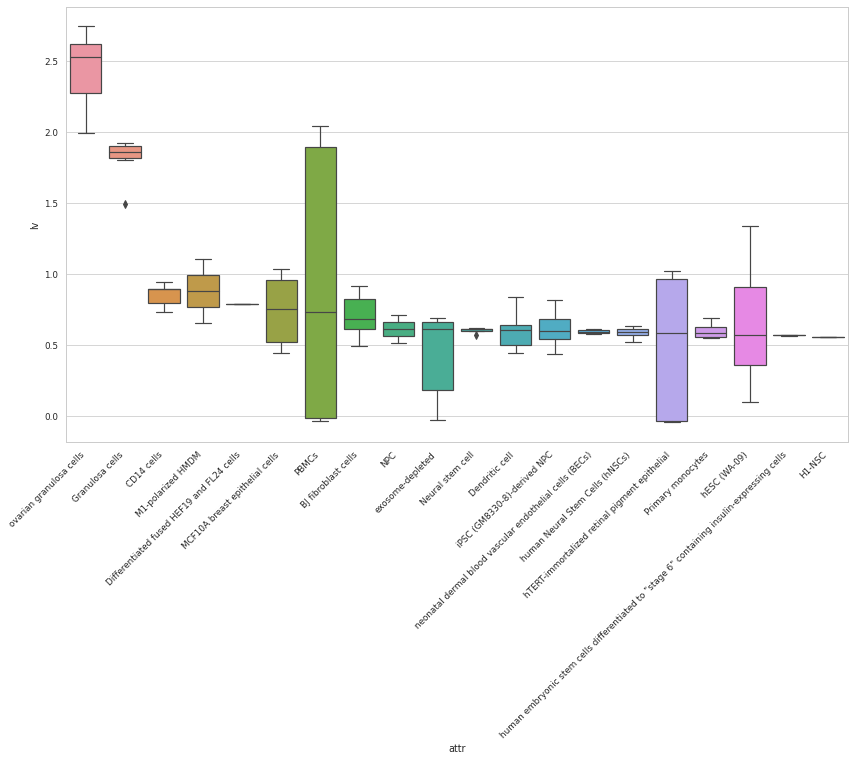

In [40]:
with sns.plotting_context("paper", font_scale=1.0), sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(14, 8))
    ax = sns.boxplot(
        data=df,
        x="attr",
        y="lv",
        order=cat_order,
        linewidth=None,
        ax=ax,
    )
    plt.xticks(rotation=45, horizontalalignment="right")

# Tissues

In [41]:
df = pd.concat(tissue_dfs[:N_TOP_LVS], ignore_index=True)
# df = pd.concat([_get_lv_rank(x) for x in tissue_dfs[:N_TOP_LVS]], ignore_index=True)

In [42]:
df.groupby("attr").mean().squeeze().sort_values(ascending=False).head(50)

attr
adrenal tumor                                               0.798195
Muscle biopsy immediately before surgery                    0.740382
non-tumor                                                   0.708005
Muscle biopsy 2hr after surgery and tourniquet              0.689389
ovary                                                       0.651734
Blood                                                       0.613820
foreskin specimen                                           0.596400
hiPSC-derived embryoid bodies                               0.575964
Dorsal Forebrain Equivalent                                 0.553621
14 day neurons                                              0.517445
skin (epidermal suction blister samples)                    0.498048
primary bone marrow derived mesenchymal progenitor cells    0.489509
Gastrointestinal Stromal Tumor                              0.473392
snap frozen tissue of normal esophagus                      0.465734
breast                       

# LV analysis

In [64]:
lv_obj1 = LVAnalysis("LV931", data)

In [65]:
lv_obj1.lv_genes.head(20)

,gene_name,LV931,gene_band
0,PER1,3.808422,17p13.1
1,MEF2D,3.090195,1q22
2,FOSL2,2.855936,2p23.2
3,RELT,2.831571,11q13.4
4,H1FX,2.815111,3q21.3
5,GNA15,2.733091,19p13.3
6,GNA13,2.345263,17q24.1
7,MCL1,2.329089,1q21.2
8,MED13L,2.245489,12q24.21
9,ELF1,2.218887,13q14.11


In [66]:
lv_data1 = lv_obj1.get_experiments_data()

SRP056295, SRP017138, SRP043080, SRP048759, SRP021191, SRP028594, SRP056197, SRP050272, SRP059735, SRP028554, SRP061932, SRP033266, SRP005279, SRP055390, SRP050493, SRP046233, SRP035679, SRP043033, SRP041885, SRP027358, SRP045500, SRP045352, SRP015360, SRP053046, 

In [67]:
lv_data1.shape

(1932, 45)

In [120]:
_tmp = lv_data1[["cell type", "LV931"]].dropna()

In [121]:
_tmp[_tmp["cell type"].str.contains("CD14 cells")]

cell type     LV931
project   run                            
SRP021191 SRR830946  CD14 cells  0.898809
          SRR830948  CD14 cells  0.943218
          SRR830949  CD14 cells  0.893341
          SRR830950  CD14 cells  0.736326
          SRR830951  CD14 cells  0.799759
          SRR830952  CD14 cells  0.943728
          SRR830953  CD14 cells  0.893452
          SRR830954  CD14 cells  0.736694
          SRR830955  CD14 cells  0.899005

In [72]:
_tmp.loc["SRP059735"]

,cell type,LV931
run,,
SRR2072610,Monocyte,0.517383
SRR2072609,Dendritic cell,0.480492
SRR2072608,Dendritic cell,0.502290
SRR2072606,Monocyte,0.638148
SRR2072607,Dendritic cell,0.446599
SRR2072605,Dendritic cell,0.642076
SRR2072603,Dendritic cell,0.791440
SRR2072604,Dendritic cell,0.619685
SRR2072602,Monocyte,0.674253


In [141]:
lv_obj3 = LVAnalysis("LV536", data)

In [142]:
lv_obj3.lv_genes.head(20)

,gene_name,LV536,gene_band
0,GTF2IRD1,6.397333,7q11.23
1,TAGLN,5.519838,11q23.3
2,HIST3H2BB,4.543711,1q42.13
3,PIAS1,3.546184,15q23
4,TMEM71,3.175580,8q24.22
5,PCBP1,2.948925,2p13.3
6,EGR1,2.824492,5q31.2
7,ACTR3,2.752111,2q14.1
8,APAF1,2.561194,12q23.1
9,MAGEH1,2.505184,NaN


In [143]:
lv_data3 = lv_obj3.get_experiments_data()

SRP007947, SRP003901, SRP055569, SRP037722, SRP008218, SRP066834, SRP015013, SRP060416, SRP019994, SRP057196, SRP042161, SRP058773, SRP012557, SRP050499, SRP055153, SRP059379, SRP030617, SRP005279, SRP051606, SRP003754, SRP058841, SRP009247, SRP050497, SRP018104, SRP007508, SRP008145, SRP041377, SRP002326, SRP035478, SRP033135, SRP017777, SRP055440, SRP057248, SRP000599, SRP013450, SRP014213, SRP055513, SRP042218, SRP034543, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (37 != 39)
  warnings.warn(


In [144]:
lv_data3.shape

(4995, 73)

In [145]:
_tmp = lv_data3[["cell type", "cancer or normal", "LV536"]].dropna()

In [147]:
_tmp[_tmp["cell type"].str.contains("transitional")].sort_values("cancer or normal")

cell type cancer or normal     LV536
project   run                                               
SRP007947 SRR333689  transitional           cancer  0.783877
          SRR333691  transitional           cancer  0.555289
          SRR333705  transitional           cancer  1.823202
          SRR333693  transitional           cancer  1.030423
          SRR333695  transitional           cancer  1.574230
          SRR333703  transitional           cancer  1.637187
          SRR333697  transitional           cancer  2.885932
          SRR333707  transitional           cancer  0.387183
          SRR333699  transitional           cancer  1.923467
          SRR333701  transitional           cancer  0.913994
          SRR333706  transitional           normal  2.289978
          SRR333704  transitional           normal  3.171180
          SRR333702  transitional           normal  2.356165
          SRR333698  transitional           normal  3.255220
          SRR333696  transitional           normal  2.678098
          SRR333694  transitional           normal  1.428419
          SRR333692  transitional           normal  2.569971
          SRR333690  transitional           normal  3.199537
          SRR333700  transitional           normal  2.671362
          SRR333708  transitional           normal  1.823486

In [50]:
lv_obj = LVAnalysis("LV116", data)

In [108]:
lv_obj.lv_traits.to_frame().loc["atherosclerosis"]

LV116    0.664563
Name: atherosclerosis, dtype: float64

In [110]:
lv_obj.lv_traits.to_frame().loc["hypertension"]

LV116   -1.955667
Name: hypertension, dtype: float64

In [111]:
lv_obj.lv_traits.to_frame().loc["MAGNETIC_HDL.C"]

LV116    0.51024
Name: MAGNETIC_HDL.C, dtype: float64

In [112]:
lv_obj.lv_traits.to_frame().loc["MAGNETIC_CH2.DB.ratio"]

LV116   -0.644745
Name: MAGNETIC_CH2.DB.ratio, dtype: float64

In [109]:
lv_obj.lv_traits.to_frame().loc["coronary artery disease"]

LV116   -0.498428
Name: coronary artery disease, dtype: float64

In [51]:
lv_obj.lv_genes.head(20)

,gene_name,LV116,gene_band
0,IFIT1,6.937650,10q23.31
1,MX1,6.650584,21q22.3
2,IFIT2,6.479595,10q23.31
3,OAS3,6.311481,12q24.13
4,OASL,6.212510,12q24.31
5,IFIT3,5.990415,10q23.31
6,OAS2,5.873026,12q24.13
7,OAS1,5.701188,12q24.13
8,MX2,5.549364,21q22.3
9,RSAD2,5.244291,2p25.2


In [118]:
lv_obj.lv_genes[lv_obj.lv_genes["gene_name"].str.startswith("ABC")]

,gene_name,LV116,gene_band
131,ABCD1,0.769893,NaN
219,ABCA7,0.465347,19p13.3
745,ABCA1,0.119768,9q31.1
754,ABCA6,0.118606,17q24.3
976,ABCC1,0.089240,16p13.11
1033,ABCC10,0.082434,6p21.1
1110,ABCC3,0.074794,17q21.33
1344,ABCG1,0.056964,21q22.3
1963,ABCB10,0.028698,1q42.13
2298,ABCA3,0.019102,16p13.3


In [52]:
lv_data = lv_obj.get_experiments_data()

SRP059039, SRP045500, SRP063059, SRP045569, SRP015670, SRP059531, SRP062958, SRP039361, SRP056733, SRP060370, SRP062966, SRP045352, SRP048804, SRP032775, SRP059172, SRP050246, SRP064458, SRP033711, SRP049820, SRP023199, SRP060416, SRP005279, SRP042161, SRP059701, SRP068139, SRP051848, SRP014428, SRP063661, SRP057205, SRP041826, SRP059057, SRP064259, SRP046226, SRP044956, SRP066356, SRP048640, SRP041885, SRP045659, SRP041647, SRP045565, SRP041620, SRP053186, SRP045441, SRP022133, SRP055874, SRP029990, SRP044206, SRP065763, SRP056443, SRP041538, SRP044593, SRP019270, SRP067934, SRP059035, SRP019936, SRP054971, SRP058237, SRP051368, SRP019758, 

In [53]:
lv_data.shape

(4274, 105)

In [114]:
# _tmp = lv_data[["cell type", "ad type", "treatment", "LV116"]].dropna()
_tmp = lv_data[["cell type", "LV116"]].dropna()

In [115]:
_tmp[_tmp["cell type"].str.contains("Monocyte")]

cell type     LV116
project   run                           
SRP066356 SRR2922614  Monocyte  0.414178
          SRR2922613  Monocyte  0.409810
          SRR2922612  Monocyte -0.182914
          SRR2922611  Monocyte  0.445308
          SRR2922610  Monocyte  0.458754
          SRR2922609  Monocyte  0.485004
          SRR2922608  Monocyte -0.169334

In [96]:
_tmp.loc["SRP066356"]

,cell type,culture condition,LV116
run,,,
SRR2922621,Breast cancer,co-culture,-0.023795
SRR2922620,Breast cancer,co-culture,-0.015148
SRR2922619,Breast cancer,co-culture,-0.006626
SRR2922618,Breast cancer,single,0.061319
SRR2922616,Breast cancer,co-culture,-0.002950
SRR2922617,Breast cancer,co-culture,-0.003162
SRR2922615,Breast cancer,co-culture,-0.003472
SRR2922614,Monocyte,co-culture,0.414178
SRR2922613,Monocyte,co-culture,0.409810


In [60]:
_tmp[_tmp["cell type"].str.contains("PBMCs")].groupby("treatment").describe()

LV116                                                              \
          count      mean       std       min       25%       50%       75%   
treatment                                                                     
HSV-1      11.0  1.831321  0.210512  1.446892  1.679989  1.902258  2.013290   
sham       11.0 -0.011554  0.015610 -0.034335 -0.018048 -0.014753 -0.006473   

                     
                max  
treatment            
HSV-1      2.047151  
sham       0.023683

In [ ]:
lv_obj2 = LVAnalysis("LV881", data)

In [ ]:
lv_obj2.lv_genes.head(20)

In [ ]:
lv_attrs = lv_obj.get_attributes_variation_score()
_tmp = pd.Series(lv_attrs.index)
lv_attrs = lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)
display(lv_attrs)

In [ ]:
with sns.plotting_context("paper", font_scale=1.0), sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(14, 8))
    ax = lv_obj2.plot_attribute("tissue", top_x_values=20)

In [ ]:
with sns.plotting_context("paper", font_scale=1.0), sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(14, 8))
    ax = lv_obj2.plot_attribute("cell type", top_x_values=20)